In [ ]:
import torch, torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
from torchvision.datasets import Flowers102

import numpy as np
import matplotlib.pyplot as plt

import timeit

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [ ]:
image_path = './'

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
train_data = Flowers102(root="./data", split="train", download=True, transform=transform)
val_data = Flowers102(root="./data", split="val", download=True, transform=transform)
test_data = Flowers102(root="./data", split="test", download=True, transform=transform)

In [ ]:
class_names = [ 'pink primrose', 'hard-leaved pocket orchid','canterbury bells',
'sweet pea', 'english marigold', 'tiger lily', 'moon orchid','bird of paradise',
'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea',
'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower',
'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily',
'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy',
'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william'
,'carnation','garden phlox','love in the mist','mexican aster','alpine sea holly'
,'ruby-lipped cattleya','cape flower','great masterwort','siam tulip'
,'lenten rose','barbeton daisy','daffodil','sword lily','poinsettia'
,'bolero deep blue','wallflower','marigold','buttercup','oxeye daisy'
,'common dandelion','petunia','wild pansy','primula','sunflower','pelargonium'
,'bishop of llandaff','gaura','geranium','orange dahlia','pink-yellow dahlia?'
,'cautleya spicata','japanese anemone','black-eyed susan','silverbush'
,'californian poppy','osteospermum','spring crocus','bearded iris','windflower'
,'tree poppy','gazania','azalea','water lily','rose','thorn apple','morning glory'
,'passion flower','lotus','toad lily','anthurium','frangipani','clematis'
,'hibiscus','columbine','desert-rose','tree mallow','magnolia','cyclamen '
,'watercress','canna lily','hippeastrum','bee balm','ball moss','foxglove'
,'bougainvillea','camellia','mallow','mexican petunia','bromelia'
,'blanket flower','trumpet creeper','blackberry lily']

In [ ]:
print(train_data) #1020 training images
print(test_data) #6149 testing images

Dataset Flowers102
    Number of datapoints: 1020
    Root location: ./data
    split=train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )
Dataset Flowers102
    Number of datapoints: 6149
    Root location: ./data
    split=test
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )


# Changing our data


loading the training set into batches, starting at 32 (common batch size #)

`from torch.utils.data import DataLoader`

Setting our seed to manual for reproducability

`torch.manual_seed(42)`


Dataloader - retrieves dataset's features and labels one sample at a time
while training a model, we typically want to pass samples in 'mini-batches'
reshuffle the data at every epoch to redue model overfitting
use Pythons multiprocessing to speed up data retrieval.
Want to use this when data can't fit into memory


`train_dl = DataLoader(train_dataset, batch_size, shuffle=True)`

In [ ]:
#from torch.utils.data import DataLoader
from torch.utils.data import DataLoader

batch_size = 32
#turning datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = batch_size,
                              num_workers = 1,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = batch_size,
                             num_workers = 1,
                             shuffle = False)

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ecdf3879550>,
 <torch.utils.data.dataloader.DataLoader at 0x7ecdf32c9150>)

In [ ]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
print(f"(Length of train_dataloader: {len(train_dataloader)} batches of {batch_size}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {batch_size}...")

(Length of train_dataloader: 32 batches of 32...
Length of test_dataloader: 193 batches of 32...


In [ ]:
#check out what's inside train_dalaloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

Image size: torch.Size([3, 128, 128])
Label: windflower


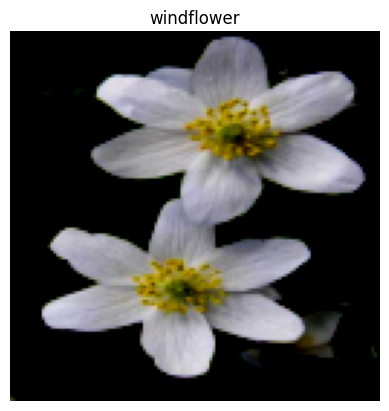

In [ ]:
#show a sampe
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
#plt.imshow(image)
plt.imshow(np.transpose(image))
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {image.shape}")
print(f"Label: {class_names[label]}")

Original shape:torch.Size([3, 128, 128]) -> [color_channels, height, width]
Image permute shape:torch.Size([128, 128, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'windflower')

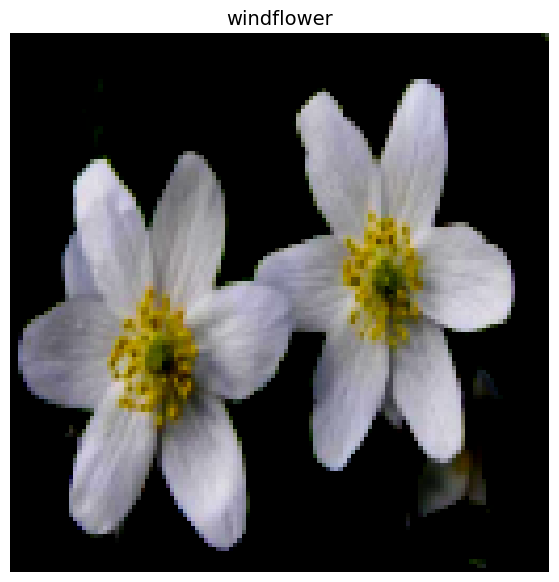

In [ ]:
img_permute = image.permute(1, 2, 0)

print(f"Original shape:{image.shape} -> [color_channels, height, width]")
print(f"Image permute shape:{img_permute.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10, 7))
plt.imshow(image.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize = 14)

In [ ]:
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 100) # Fully connected layer with 100 hidden neurons
        self.fc2 = nn.Linear(100, class_names) # Fully connected layer with num_classes outputs

    def forward(self, x):
        x = x.view(-1, 32*32*3) # reshape the input tensor
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x

new_image = image.permute(1, 2, 0)
print(new_image.shape)

torch.Size([128, 128, 3])


In [ ]:
class FlowerCNN(nn.Module):
    def __init__(self, num_classes=102):
        super(FlowerCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            #layer 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #layer 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #layer 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [ ]:
model = FlowerCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
start = timeit.timeit()

#storing train_losses so we can plot it
train_losses = []
#stroing val_accuraties so we can plot it
val_accuracies = []

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        #calculating training accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total

    train_losses.append(epoch_loss)
    val_accuracies.append(epoch_acc)
print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

end = timeit.timeit()
total_time = (end - start) / 60
print(f"\nTraining completed in {total_time:.2f} minutes")

Epoch [10/10], Loss: 0.5860, Accuracy: 82.75%

Training completed in 0.00 minutes


In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 16.91%


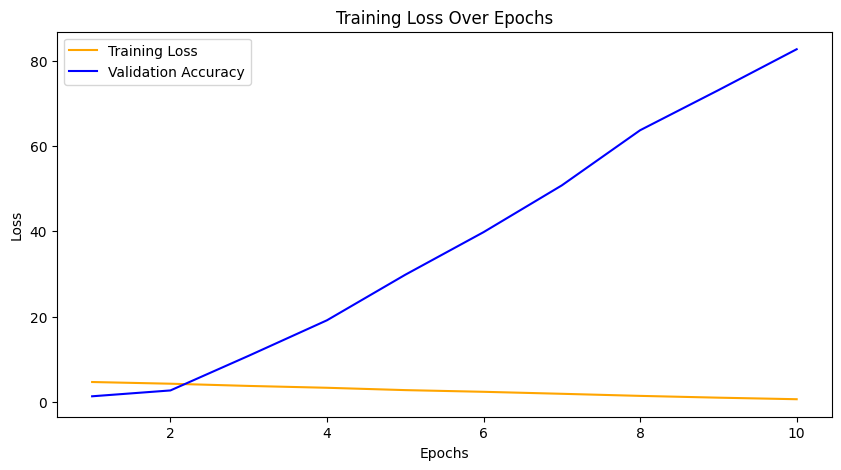

In [ ]:
# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, linestyle="-", label="Training Loss", color="orange")
plt.plot(range(1, num_epochs + 1), val_accuracies, linestyle="-", label="Validation Accuracy", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

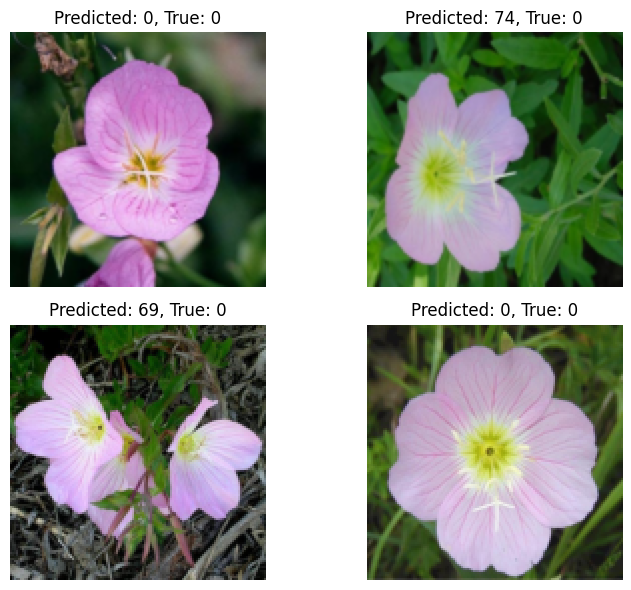

In [ ]:
# Get a batch of test images
data_iter = iter(test_loader)
images, labels = next(data_iter)

# Make predictions
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Convert images back to numpy for visualization
images = images.cpu().numpy()
images = np.transpose(images, (0, 2, 3, 1))  # Convert from (C, H, W) to (H, W, C)
images = (images * 0.5) + 0.5  # Unnormalize if mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]

# Plot images with predicted and true labels
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    if i >= len(images): break  # Only plot as many images as available
    ax.imshow(images[i])
    ax.axis("off")
    ax.set_title(f"Predicted: {predicted[i].item()}, True: {labels[i].item()}")

plt.tight_layout()
plt.show()